<a href="https://colab.research.google.com/github/DJCIrving/c201-hadoken/blob/master/MD_Pr%C3%A1cticaClustering_DJCIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Practica N5  Clustering**

Alumno: De Jesus Celestino Irving Manuel 

Correo: irvingdejesus.fi.unam@gmail.com

N° de cuenta: 314175850

Materia: Mineria de Datos 

Ciclo: 2020-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb            #Biblioteca para visualización de datos basado en matplotlib
#Para que las figuras aparezcan en línea dentro del notebook
%matplotlib inline 

### **I. Acceso a datos y selección de características**

#### **1) Lectura de datos**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

Fuente: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BreastCancer = pd.read_csv('/content/drive/MyDrive/WDBCOriginal.csv')

BreastCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
print(BreastCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


2) Seleccion de caracteristicas 


In [ ]:
Matriz = BreastCancer.corr(method='pearson')
Matriz

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


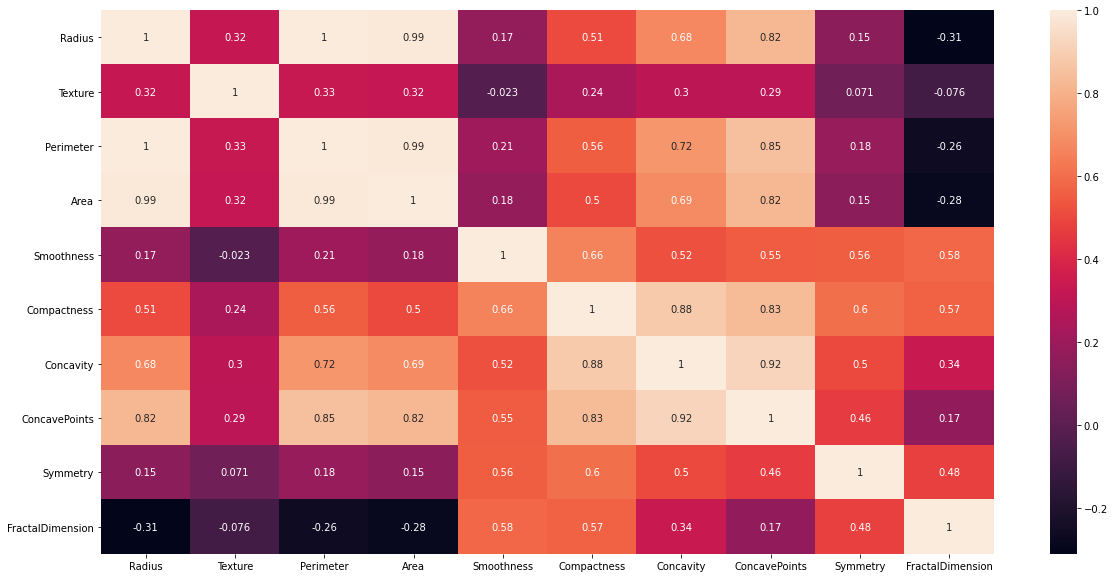

In [ ]:
plt.figure(figsize = (20,10))
sb.heatmap(Matriz, annot = True)    #Heatmap es útil para una representación gráfica de datos en colores

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Compactness [Posición 7]

4) Concavity [Posición 8]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

**Referencia:** Lámina 44 de la presentación '9 MD_SelecciónCaracterísticas.pdf'

In [ ]:
VariablesModelo = BreastCancer.iloc[:, [3, 5, 7, 8, 10, 11]].values  #iloc se utiliza para seleccionar filas y columnas según su ubicación
VariablesModelo

array([[1.038e+01, 1.001e+03, 2.776e-01, 3.001e-01, 2.419e-01, 7.871e-02],
       [1.777e+01, 1.326e+03, 7.864e-02, 8.690e-02, 1.812e-01, 5.667e-02],
       [2.125e+01, 1.203e+03, 1.599e-01, 1.974e-01, 2.069e-01, 5.999e-02],
       ...,
       [2.808e+01, 8.581e+02, 1.023e-01, 9.251e-02, 1.590e-01, 5.648e-02],
       [2.933e+01, 1.265e+03, 2.770e-01, 3.514e-01, 2.397e-01, 7.016e-02],
       [2.454e+01, 1.810e+02, 4.362e-02, 0.000e+00, 1.587e-01, 5.884e-02]])

In [ ]:
VariablesModelo2 = np.array(BreastCancer[['Texture', 'Area', 'Compactness','Concavity', 'Symmetry', 'FractalDimension']])
VariablesModelo2

array([[1.038e+01, 1.001e+03, 2.776e-01, 3.001e-01, 2.419e-01, 7.871e-02],
       [1.777e+01, 1.326e+03, 7.864e-02, 8.690e-02, 1.812e-01, 5.667e-02],
       [2.125e+01, 1.203e+03, 1.599e-01, 1.974e-01, 2.069e-01, 5.999e-02],
       ...,
       [2.808e+01, 8.581e+02, 1.023e-01, 9.251e-02, 1.590e-01, 5.648e-02],
       [2.933e+01, 1.265e+03, 2.770e-01, 3.514e-01, 2.397e-01, 7.016e-02],
       [2.454e+01, 1.810e+02, 4.362e-02, 0.000e+00, 1.587e-01, 5.884e-02]])

In [ ]:
VariablesModelo.shape

(569, 6)

In [ ]:
pd.DataFrame(VariablesModelo)

,0,1,2,3,4,5
0,10.38,1001.0,0.27760,0.30010,0.2419,0.07871
1,17.77,1326.0,0.07864,0.08690,0.1812,0.05667
2,21.25,1203.0,0.15990,0.19740,0.2069,0.05999
3,20.38,386.1,0.28390,0.24140,0.2597,0.09744
4,14.34,1297.0,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11590,0.24390,0.1726,0.05623
565,28.25,1261.0,0.10340,0.14400,0.1752,0.05533
566,28.08,858.1,0.10230,0.09251,0.1590,0.05648
567,29.33,1265.0,0.27700,0.35140,0.2397,0.07016


### **II. Clustering Jerárquico**

Algoritmo: Jerárquico Ascendente 

In [ ]:
#Se importan las bibliotecas de clustering jerárquico
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

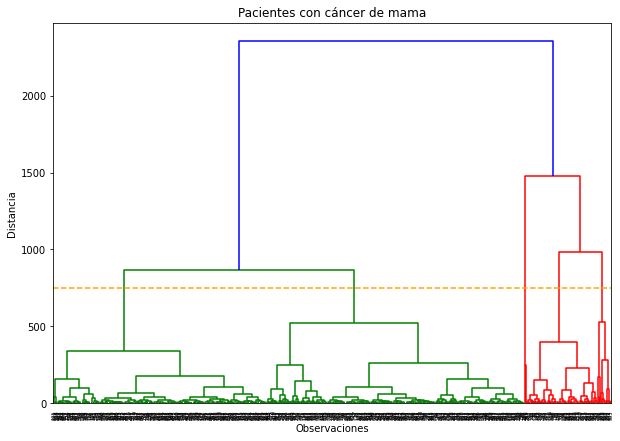

In [ ]:
#Se crea el árbol
plt.figure(figsize=(10, 7))
plt.title("Pacientes con cáncer de mama")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(VariablesModelo, method='complete'))
plt.axhline(y=750, color='orange', linestyle='--')

In [ ]:
#Se crean los clusters
MJerarquico = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
MJerarquico.fit_predict(VariablesModelo)
MJerarquico.labels_

array([1, 3, 3, 4, 3, 4, 3, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 3, 1, 1, 1, 3, 1, 1, 3, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1,
       1, 3, 4, 1, 4, 1, 4, 1, 4, 3, 1, 4, 3, 1, 1, 4, 4, 4, 1, 4, 1, 1,
       4, 4, 4, 1, 3, 4, 1, 1, 4, 1, 1, 1, 3, 1, 4, 1, 0, 3, 4, 3, 1, 3,
       4, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 3, 0, 1, 1, 1, 1, 3, 1, 3, 4, 1,
       1, 1, 3, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 3, 3, 4, 0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4,
       4, 1, 1, 1, 2, 3, 1, 4, 1, 4, 3, 4, 4, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       3, 1, 4, 1, 0, 1, 4, 1, 4, 1, 1, 1, 3, 4, 2, 1, 1, 1, 4, 4, 3, 3,
       1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 3, 4, 1, 0, 3, 1, 1, 1, 4,
       4, 1, 3, 4, 1, 1, 4, 4, 3, 4, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 4, 1, 1, 4, 1, 4, 0, 4, 1, 4, 4, 3, 1, 1, 3, 4, 3, 1, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 3,

In [ ]:
pd.DataFrame(MJerarquico.labels_)

,0
0,1
1,3
2,3
3,4
4,3
...,...
564,0
565,3
566,1
567,3


In [ ]:
BreastCancer['clusterH'] = MJerarquico.labels_
BreastCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,3
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,3
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,4
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,3
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3


In [ ]:
#Cantidad de elementos en los clusters
BreastCancer.groupby(['clusterH'])['clusterH'].count()

clusterH
0     14
1    263
2      3
3     72
4    217
Name: clusterH, dtype: int64

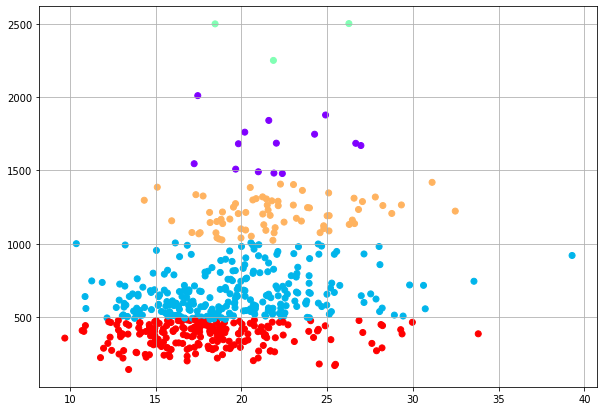

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(VariablesModelo[:,0], VariablesModelo[:,1], c=MJerarquico.labels_, cmap='rainbow')
plt.grid()
plt.show()

In [ ]:
CentroidesH = BreastCancer.groupby(['clusterH'])['Texture', 'Area', 'Compactness','Concavity', 'Symmetry', 'FractalDimension'].mean()
CentroidesH

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Texture,Area,Compactness,Concavity,Symmetry,FractalDimension
clusterH,,,,,,
0,21.867857,1676.214286,0.186916,0.261286,0.194193,0.061179
1,19.406274,661.572624,0.106559,0.088309,0.178629,0.061496
2,22.203333,2416.666667,0.180600,0.323567,0.183633,0.056393
3,22.009028,1202.805556,0.143579,0.172599,0.191032,0.059826
4,18.039401,374.743318,0.082252,0.047216,0.180082,0.065554


**Cluster 0:** 14 pacientes con indicios de cáncer maligno, con un área promedio de tumor de 1676 pixeles y una desviación estándar de textura de 21 pixeles. Aparentemente es un tumor compacto (0.18 pixeles), cuyo número de sectores de concavidad alcanza 0.26 pixeles, una simetría de 0.19 y una aproximación de frontera, dimensión fractal, promedio de 0.06 pixeles.


**Cluster 1:** 263 pacientes con indicios de cáncer maligno, con un área promedio de tumor de 661 pixeles y una desviación estándar de textura de 19 pixeles. Aparentemente es un tumor compacto (0.18 pixeles), cuyo número de sectores de concavidad alcanza 0.08 pixeles, una simetría de 0.19 y una aproximación de frontera, dimensión fractal, promedio de 0.06 pixeles.

**Cluster 2:** 3

**Cluster 3:** 72

**Cluster 4:** 217




### **III. Clustering particional**

Algoritmo: k-means


In [ ]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
SSE = []
for i in range(2, 16):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(VariablesModelo)
    SSE.append(km.inertia_)

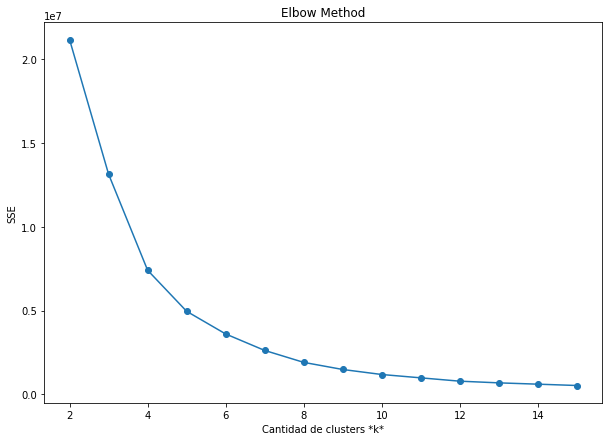

In [ ]:
#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 16), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator       #https://github.com/arvkevi/kneed/blob/master/kneed/   Utiliza una interpolación
kl = KneeLocator(range(2, 16), SSE, curve="convex", direction="decreasing")
kl.elbow

5

In [ ]:
#Se crean los clusters 
#random_state se utiliza para inicializar el generador interno de números aleatorios (mismo resultado)
MParticional = KMeans(n_clusters=5, random_state=0).fit(VariablesModelo)
MParticional.predict(VariablesModelo)
MParticional.labels_

array([4, 2, 2, 1, 2, 3, 4, 3, 3, 3, 4, 4, 2, 4, 3, 3, 3, 4, 2, 3, 3, 1,
       3, 2, 4, 4, 3, 2, 4, 4, 2, 1, 4, 2, 4, 4, 3, 3, 3, 3, 3, 1, 2, 3,
       3, 2, 1, 3, 1, 3, 1, 3, 1, 4, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3,
       1, 1, 1, 3, 2, 1, 4, 3, 1, 4, 3, 4, 2, 3, 1, 3, 0, 2, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 3, 3, 1, 1, 1, 1, 3, 4, 4, 1, 2, 0, 3, 3, 3, 3, 2, 3, 2, 1, 4,
       4, 4, 2, 3, 1, 1, 3, 1, 1, 4, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1,
       3, 1, 4, 4, 1, 1, 1, 2, 2, 1, 0, 3, 1, 4, 4, 3, 1, 3, 4, 1, 1, 1,
       1, 4, 3, 3, 0, 2, 4, 1, 3, 1, 4, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 4,
       2, 3, 1, 4, 0, 3, 3, 3, 1, 4, 3, 3, 2, 1, 0, 4, 3, 3, 1, 1, 2, 2,
       3, 3, 1, 4, 3, 3, 1, 3, 3, 3, 4, 1, 1, 2, 1, 3, 0, 2, 3, 4, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 1, 2, 1, 2, 4, 2, 3, 2, 3, 4, 4, 2, 4, 4, 4,
       4, 2, 1, 3, 3, 1, 3, 1, 2, 1, 4, 1, 1, 2, 3, 3, 2, 1, 2, 4, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2,

In [ ]:
BreastCancer['clusterP'] = MParticional.labels_
BreastCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1,4
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,3,2
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,3,2
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,4,1
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0,2
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,3,2
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1,4
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3,2


In [ ]:
BreastCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0     12
1    205
2     71
3    206
4     75
Name: clusterP, dtype: int64

In [ ]:
CentroidesP = MParticional.cluster_centers_
pd.DataFrame(CentroidesP.round(4))

,0,1,2,3,4,5
0,22.5467,1934.1667,0.1907,0.2814,0.1929,0.0604
1,18.0333,368.6868,0.0809,0.0453,0.1803,0.0655
2,22.0887,1237.9155,0.1485,0.1821,0.1918,0.0601
3,18.9190,582.7010,0.0968,0.0711,0.1749,0.0617
4,20.5707,878.8360,0.1335,0.1372,0.1887,0.0614


**Cluster 0:** 12 pacientes con alta probabilidad de cáncer maligno, con un área promedio de tumor de 1934 pixeles y una desviación estándar de textura de 22.5 pixeles (Es el cluster de pacientes con mayor tamaño de tumor). Aparentemente es un tumor compacto (0.19 pixeles), cuyo número de sectores de concavidad alcanza 0.28 pixeles, una simetría de 0.19 y una aproximación de frontera, dimensión fractal, promedio de 0.06 pixeles.

**Cluster 1:** ...

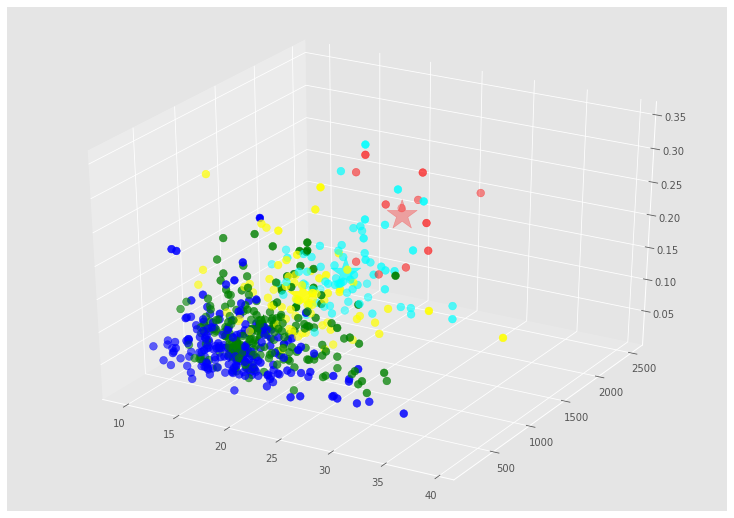

In [ ]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'cyan', 'green', 'yellow']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter (VariablesModelo[:, 0], VariablesModelo[:, 1], VariablesModelo[:, 2], marker='o', c=asignar, s=60)
ax.scatter(CentroidesP[:, 0], CentroidesP[:, 1], CentroidesP[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
#Se identifica a los pacientes más cercanos con respecto a cada centroide
Cercanos, _ = pairwise_distances_argmin_min(MParticional.cluster_centers_, VariablesModelo)
Cercanos

array([ 82, 405, 366, 149, 157])

In [ ]:
Pacientes = BreastCancer['IDNumber'].values
for row in Cercanos:
    print(Pacientes[row])

P-8611555
P-904971
P-9011494
P-869931
P-8711216
